In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
import baltic as bt
import logomaker
import os
from function import barplot_annotate_brackets
warnings.simplefilter('ignore')

In [2]:
os.makedirs('../Figure/Supplementary Figure6', exist_ok=True)

# load data

In [3]:
family = 'MER11'

Dfam_RM = pd.read_csv('../data/TE/{}.annotation.csv'.format(family))
Dfam_RM.index = Dfam_RM['repeat name']
Lift_df = pd.read_csv('../data/Liftover/{}_Liftover_rate.csv'.format(family), index_col=0)
KZFP_df = pd.read_csv('../data/overlap/{}_KZFP.csv'.format(family))
MSA_df = pd.read_csv('../data/MSA/{}_MSA.csv'.format(family), index_col=0)
MSA_df.columns = list(map(int, MSA_df.columns))

In [4]:
# obtain consevation level
consensus_dict = dict()

for subfamily in Lift_df.index:

    conserved_df = pd.read_csv('../data/MSA/conserved/{}_conserved.csv'.format(subfamily), index_col=0)
    conserved_df.columns = conserved_df.columns.astype('int64')
    consensus_dict[subfamily] = conserved_df

In [5]:
# obtain TE targets
KZFP_target = pd.read_csv('../data/targets/TE_targets_for_analysis.csv')
KZFP_target = KZFP_target[KZFP_target['repeat family name']==family]
display(KZFP_target.head())


# obtain KRAB-ZFP metadata
KZFP_dataset_df = pd.read_csv('../data/ChIP-seq/KRABopedia_GR_summary_240206.csv', index_col=0)
KZFP_dataset_df = KZFP_dataset_df[KZFP_dataset_df['classification (Genome research)']=='protein_coding']
KZFP_dataset_dict = KZFP_dataset_df.to_dict()
KZFP_dataset_df

,KZFP gene symbol,repeat subfamily name,ratio,p value,q value,log10 q value,normalized score,rank,criteria,overlap peak count to all copies,...,repeat class,repeat classification,emergence era of TE subfamily,emergence age of TE subfamily,emegence era of TE subfamily is in primate,emergence era of KZFP for analysis,emergence age of KZFP for analysis,emergence age of KZFP in Imbeault et al.,emergence age of KZFP in Tribolet-Hardy et al.,emegence era of KZFP is in primate
98,ZNF808,MER11B,813.686425,0.000000e+00,1.808280e-321,320.742734,1.000000,Primary,True,241,...,ERV/LTR,ERV/LTR,Catarrhini,29.4,True,Catarrhini,29.4,29.1,29.4,True
99,ZNF808,MER11A,719.017459,0.000000e+00,1.808280e-321,320.742734,1.000000,Primary,True,587,...,ERV/LTR,ERV/LTR,Catarrhini,29.4,True,Catarrhini,29.4,29.1,29.4,True
101,ZNF808,MER11C,478.152255,0.000000e+00,1.808280e-321,320.742734,1.000000,Primary,True,1151,...,ERV/LTR,ERV/LTR,Catarrhini,29.4,True,Catarrhini,29.4,29.1,29.4,True
209,ZNF736,MER11D,50.922737,2.437246e-58,1.781627e-56,55.749183,0.173717,Secondary,True,44,...,ERV/LTR,ERV/LTR,Hominoidea,20.2,True,Simiiformes,43.2,43.1,43.2,True
230,ZNF727,MER11C,537.325154,0.000000e+00,7.223240e-321,320.141268,1.000000,Primary,True,172,...,ERV/LTR,ERV/LTR,Catarrhini,29.4,True,Hominoidea,20.2,19.9,20.2,True


,gene_name,gene_id,classification (Genome research),Age,Age (Genome research),Age adjusted,Species,KRAB domain,interactK1,interact with,Number of ZNFs,z_C2H2_miss,cluster
PRDM7,NaN,NaN,protein_coding,NaN,352.0,352.0,NaN,NaN,NaN,NaN,NaN,NaN,noCluster
ZNF705A,ZNF705A,ENSG00000196946,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,-0.910143,noCluster
ZNF705B,ZNF705B,ENSG00000215356,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,NaN,noCluster
ZNF705G,ZNF705G,ENSG00000215372,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,2.0,6.659968,noCluster
ZNF212,ZNF212,ENSG00000170260,protein_coding,179.2,312.1,312.0,Platypus,NaN,NO,NaN,3.0,-0.910143,chr7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF724,NaN,NaN,protein_coding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr19.4
ZNF735,NaN,NaN,protein_coding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr7.1
ZNF738,NaN,NaN,protein_coding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr19.4
ZNF875,NaN,NaN,protein_coding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noCluster


In [6]:
# obtain binding site
motif_metadata_df = pd.read_csv('../data/motif/TE_KZFP_binding_sites.csv')

# filtering
condition1 = (motif_metadata_df['discovery proportion']>=50) & (motif_metadata_df['log10 p-value']>=4)
condition2 = motif_metadata_df['motif start'] != motif_metadata_df['motif end']
condition3 = motif_metadata_df['repeat family name']==family
motif_metadata_df_fil = motif_metadata_df[condition1 & condition2 & condition3].sort_values(by='log10 p-value', ascending=False)

motif_metadata_df_nodup = motif_metadata_df_fil[motif_metadata_df_fil[['repeat family name', 'KZFP gene symbol']].duplicated()==False]
motif_metadata_df_nodup

,repeat family name,KZFP gene symbol,KZFP experiment,motif start,motif end,motif center,motif strand,peak overlap motif,discovery proportion,distance to peak summit,log10 p-value,E-value significant figure,E-value log10
29,MER11,ZNF525,GSE78099,970.0,990.0,980,-,405.0,68.994889,17.180247,11.659556,7.6,52
12,MER11,ZNF468,GSE78099,1251.0,1271.0,1261,+,193.0,76.587302,7.248705,6.497573,1.7,817
28,MER11,ZNF433,GSE78099,305.0,319.0,312,-,85.0,63.909774,10.952941,6.344862,2.4,498
30,MER11,ZNF727,GSE200964,1088.0,1259.0,1173,+,105.0,65.217391,14.009524,5.291579,7.2,169
31,MER11,ZNF736,GSE78099,670.0,684.0,677,+,40.0,75.471698,17.525000,4.673664,1.1,1021


In [7]:
# motif

from Bio import motifs

motif_matrix_df = dict()
for KZFP, exp in motif_metadata_df_nodup[['KZFP gene symbol', 'KZFP experiment']].value_counts().index:

    with open('../data/motif/raw_motif/{}_{}_motif_sig_500_231120.meme'.format(KZFP, exp)) as f:

        fr = f.read().split('\n')

        check = False
        motif_list = list()
        for line in fr:

            if 'letter' in line:
                check = True
            
            elif check and '\t' in line:

                value = [float(i) for i in line.replace(' ', '').split('\t')[:4]]
                motif_list.append(value)
        
    df = pd.DataFrame(motif_list, columns=['A', 'C', 'G', 'T'])
    motif_matrix_df[(KZFP, exp)] = df

# process data

In [8]:
reorder_dict = {'MER11_2': 'MER11_1', 'MER11_3': 'MER11_2', 'MER11_5': 'MER11_3', 'MER11_0': 'MER11_4', 'MER11_4': 'MER11_5', 'MER11_1': 'MER11_6'}

In [9]:
KZFP_df_fil = KZFP_df[KZFP_df['KZFP gene symbol'].isin(pd.unique(KZFP_target['KZFP gene symbol']))]

In [10]:
# カラーをつける
color_subfamily_dict = dict()
color_name_dict = dict()

color_list = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink']
branch_list = ['Vertebrata', 'Tetrapoda', 'Amniota', 'Mammalia', 'Theria', 'Eutheria', 'Boreoeutheria', 'Euarchontoglires', 'Primatomorpha', 
               'Primates', 'Haplorrhini', 'Simiiformes', 'Catarrhini', 'Hominoidea', 'Hominidae', 'Homininae', 'Hominini']

subfamily_list = ['MER11_2', 'MER11_3', 'MER11_5', 'MER11_0', 'MER11_4', 'MER11_1']

color_list = ['blue', 'red', 'yellow', 'green', 'purple', 'orange', 'pink', 'red']


for i, (subfamily, color) in enumerate(zip(subfamily_list, color_list)):

    color_subfamily_dict[subfamily] = color

        
for i, (subfamily, name) in enumerate(Dfam_RM[['repeat adjusted subfamily name', 'repeat name']].values):

    color_name_dict[name] = color_subfamily_dict[subfamily]


# Supplementary Fig.6A

In [11]:
UMAP = pd.read_csv('../data/subfamily classification/{}_trimming99_UMAP_{}.csv'.format(family, '230114'), index_col=0)
UMAP.head()

,UMAP_1,UMAP_2
MER11C_chr1_dup1,4.354409,3.643618
MER11C_chr1_dup2,4.431177,3.722873
MER11C_chr1_dup3,4.367406,3.656327
MER11C_chr1_dup4,13.285274,14.634419
MER11C_chr1_dup5,8.311188,-8.148288


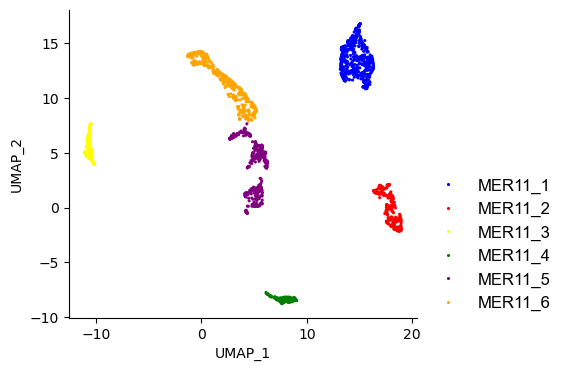

In [12]:
fig = plt.figure(figsize=[4.5, 4])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data = UMAP.loc[Dfam_RM.index].copy()
x = data['UMAP_1']
y = data['UMAP_2']
hue = Dfam_RM['repeat adjusted subfamily name'].apply(lambda x:reorder_dict[x])
order = reorder_dict.values()
pallette = ['blue', 'red', 'yellow', 'green', 'purple', 'orange']

sns.scatterplot(x=x, y=y, hue=hue, hue_order=order, palette=pallette, linewidth=0, s=5, ax=ax)

ax.legend(loc=[1.02, 0], frameon=False)
[ax.spines[loc].set_visible(False) for loc in ['right', 'top']]

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6A.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6A.pdf', bbox_inches='tight', transparent=True, dpi=300)


# Supplementary Fig.6B

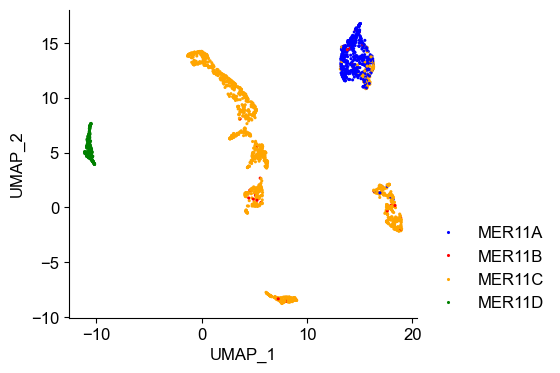

In [13]:
fig = plt.figure(figsize=[4.5, 4])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data = UMAP.loc[Dfam_RM.index]
x = data['UMAP_1']
y = data['UMAP_2']
hue = Dfam_RM['repeat subfamily name']
order = ['MER11A', 'MER11B', 'MER11C', 'MER11D']
pallette = ['blue', 'red', 'orange', 'green']

sns.scatterplot(x=x, y=y, hue=hue, hue_order=order, palette=pallette, linewidth=0, s=5, ax=ax)

ax.legend(loc=[1.02, 0], frameon=False)
[ax.spines[loc].set_visible(False) for loc in ['right', 'top']]

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6B_UMAP.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6B_UMAP.pdf', bbox_inches='tight', transparent=True, dpi=300)


<Figure size 640x480 with 0 Axes>

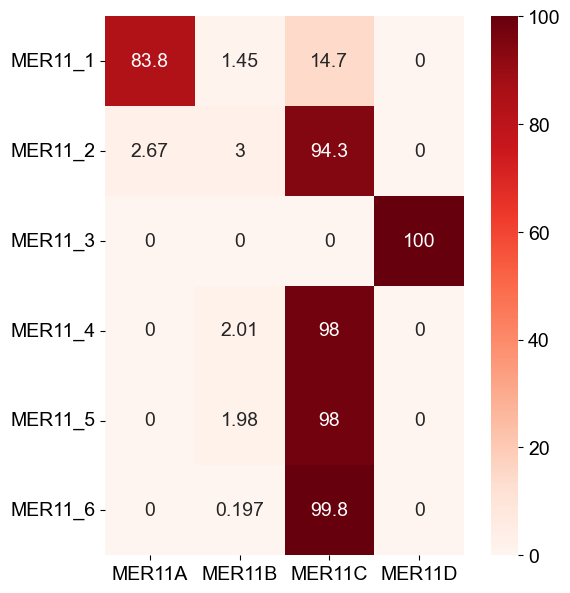

In [14]:
fig = plt.figure()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

crosstab = pd.crosstab(Dfam_RM['repeat adjusted subfamily name'].apply(lambda x:reorder_dict[x]), Dfam_RM['repeat subfamily name'], normalize='index')

crosstab = crosstab.sort_index()
fig = plt.figure(figsize=[7, 7])
sns.heatmap(crosstab*100, cmap='Reds', square=True, annot=True, fmt='.3g')

plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation=0)


plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6B_heatmap.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6B_heatmap.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Supplementary Fig.6C

In [15]:
# KZFPの結合を調べる
crosstab = pd.crosstab(KZFP_df_fil['repeat name'], KZFP_df_fil['KZFP gene symbol'])
Dfam_RM_KZFP = pd.concat([Dfam_RM, crosstab>=1], axis=1)
Dfam_RM_KZFP = Dfam_RM_KZFP[Dfam_RM_KZFP['repeat name'].isna()==False]
Dfam_RM_KZFP = Dfam_RM_KZFP.fillna(False)
Dfam_RM_KZFP = Dfam_RM_KZFP.loc[reversed(Dfam_RM_KZFP.index)]

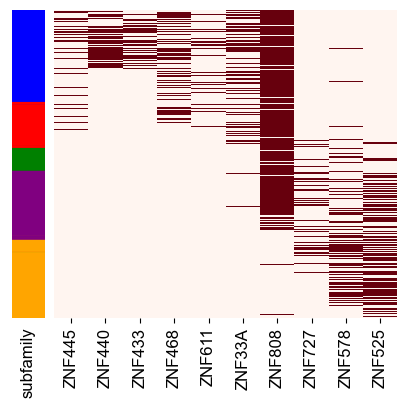

In [16]:
fig = plt.figure(figsize=[5, 4])
gs = GridSpec(1, 9)

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

Dfam_RM_fil = Dfam_RM_KZFP[Dfam_RM_KZFP['repeat adjusted subfamily name']!='MER11_5']

# subfamily
ax = plt.subplot(gs[0])

data = Dfam_RM_fil

for i, name in enumerate(data['repeat name']):

    color = color_name_dict[name]
    y = len(data) - i
    ax.hlines(y, 0, 1, color=color)

ax.set_ylim(0, len(data))
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([0.5])
ax.set_xticklabels(['subfamily'], rotation=90)
ax.tick_params(left=False, right=False, bottom=False, top=False)
[ax.spines[loc].set_visible(False) for loc in ['top','right','left', 'bottom']]


# binding profile
ax = plt.subplot(gs[1:])

KRAB_list = ['ZNF445', 'ZNF440', 'ZNF433', 'ZNF468', 'ZNF611', 'ZNF33A', 'ZNF808', 'ZNF727', 'ZNF578', 'ZNF525']
data = Dfam_RM_fil[KRAB_list]

sns.heatmap(data, cmap='Reds', vmin=0, vmax=1, ax=ax, cbar=False)

#ax.set_xlabel('KRAB-ZFPs')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.tick_params(left=False)

plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6C.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6C.pdf', bbox_inches='tight', transparent=True, dpi=300)


# Supplementary Fig.6D

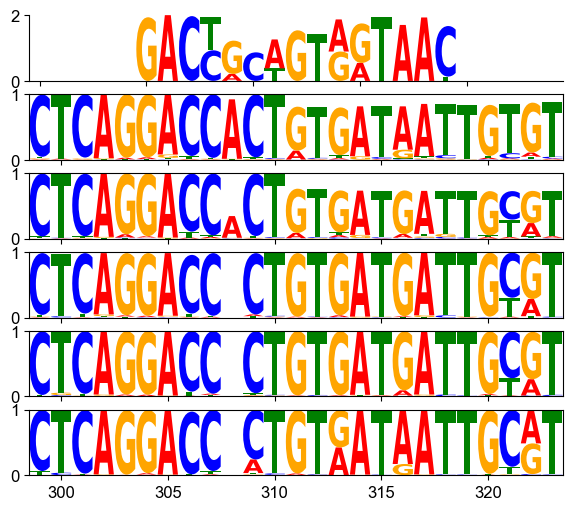

In [17]:
import logomaker
from matplotlib.gridspec import GridSpec

color_dict = {'A': 'red', 'T': 'green', 'C': 'blue', 'G': 'orange'}

columns = ['repeat family name', 'KZFP gene symbol', 'KZFP experiment', 'motif start', 'motif end', 'motif strand', 'peak overlap motif', 'discovery proportion', 'log10 p-value']

motif = motif_metadata_df_nodup[motif_metadata_df_nodup['KZFP gene symbol']=='ZNF433']
family, KZFP, exp, start, end, strand, overlap_count, discovery, motif_pvalue = motif[columns].values.tolist()[0]
        
start = int(start)
end = int(end)

cluster_list = ['MER11_2', 'MER11_3', 'MER11_0', 'MER11_4', 'MER11_1']

fig = plt.figure(figsize=[20, (len(cluster_list)+2)*1])
gs = GridSpec(len(cluster_list)+2, 20)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

ax_list = list()

ax_list.append(ax)

# motif
ax = plt.subplot(gs[0, 7:14])
data = (motif_matrix_df[(KZFP, exp)]/0.25).apply(np.log2)

if strand == '-':
    data = data.sort_index(ascending=False)[['T', 'G', 'C', 'A']]
            
data = pd.DataFrame(np.where(data>=0, data, 0), columns=['A', 'C', 'G', 'T'])

logomaker.Logo(data, 
               color_scheme=color_dict, 
               ax=ax)

#ax.set_ylabel('motif', rotation=0)
ax.set_xticklabels('')
#ax.set_yticklabels('')
ax.set_ylim(0, 2)
ax.set_xlim(0-5.5, len(data)+4.5)
ax.set_xticklabels('')
#ax.set_yticklabels('')

[ax.spines[loc].set_visible(False) for loc in ['top','right']]

ax_list.append(ax)


# consevation level of each subfamily
for i, cluster in enumerate(cluster_list):

    ax = plt.subplot(gs[i+1, 7:14])
            
    data = consensus_dict[cluster].T[['A', 'C', 'G', 'T']][start-10:end+10]
    logomaker.Logo(data, 
                   color_scheme=color_dict, 
                   ax=ax)

    ax.set_ylabel('', rotation=0)
    ax.set_yticklabels([0, 1])
    ax.set_xlim(start-6.5, end+4.5)
    ax.set_ylim(0, 1)

    if i != len(cluster_list)-1 :

        ax.set_xticklabels('')

    ax_list.append(ax)


    #except:
    #    plt.close()
    #    print('ERROR')

plt.rcParams["font.family"] = "Arial"
fig.savefig('../Figure/Supplementary Figure6/Supplementary Figure6D.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6D.pdf', bbox_inches='tight', transparent=True, dpi=300)


# Supplementary Fig.6E

### ZNF468

In [18]:
gene = 'ZNF468'

In [19]:
# annotation
Dfam_RM_gene = Dfam_RM_fil

# MSA
MSA = MSA_df.loc[Dfam_RM_gene.index]

# KZFP
motif_start, motif_end = 1251, 1271
start, end = motif_start-50, motif_end+50
KZFP = KZFP_df_fil[(KZFP_df_fil['KZFP gene symbol']==gene) & (KZFP_df_fil['summit position in repeat alignment']>=start) & (KZFP_df_fil['summit position in repeat alignment']<=end) ]


In [20]:
# motif
motif_metadata = motif_metadata_df_nodup[motif_metadata_df_nodup['KZFP gene symbol']==gene]
motif = motif_matrix_df[(gene, 'GSE78099')][['A', 'C', 'G', 'T']]

if motif_metadata['motif strand'].values[0] == '-':

    motif = motif.sort_index(ascending=False)[['T', 'G', 'C', 'A']]

sequence = ''
for position in motif.index:

    v = motif.loc[position].sort_values(ascending=False)
    b = v.index[0]
    
    sequence += b

print(sequence)
sequence = list(sequence.lower())

CCCGGCGCCCCCTCCCTTCCC


In [21]:
# consensus sequence derived by TE copies overlapping with KZFP peaks

MSA_KZFP = MSA[MSA.index.isin(KZFP['repeat name'])]
consensus_with_KZFP = ''
consensus_matrix_with_KZFP = list()

for position in MSA_KZFP.columns:

    count = MSA_KZFP[position].value_counts(normalize=True).rename(position)
    consensus_matrix_with_KZFP.append(count)

consensus_matrix_with_KZFP = pd.concat(consensus_matrix_with_KZFP, axis=1).T.fillna(0)
consensus_matrix_with_KZFP = consensus_matrix_with_KZFP[['a', 'g', 'c', 't', '-']]
consensus_matrix_with_KZFP.columns = ['A', 'G', 'C', 'T', '-']

# remove deletion
consensus_matrix_with_KZFP_not_deletion = consensus_matrix_with_KZFP[consensus_matrix_with_KZFP['-']<0.5]
consensus_matrix_with_KZFP_not_deletion = consensus_matrix_with_KZFP_not_deletion.loc[motif_start-1:motif_end-1]
not_deletion_index = consensus_matrix_with_KZFP_not_deletion.index

consensus_with_KZFP = ''
for position in consensus_matrix_with_KZFP_not_deletion.index:
    
    count = MSA_KZFP[position].value_counts(normalize=True)
    consensus_with_KZFP += count.index[0]


In [22]:
# MSA for heatmap
heatmap = MSA.T.loc[not_deletion_index].T

for col, base in zip(heatmap.columns, consensus_with_KZFP):
    
    heatmap[col] = heatmap[col]==base

MSA.T.loc[not_deletion_index].T

,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,...,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270
repeat name,,,,,,,,,,,,,,,,,,,,,
MER11A_chr6_dup35,t,c,t,t,g,c,a,c,c,c,...,c,t,c,c,c,c,t,t,t,t
MER11A_chr16_dup4,t,c,t,t,g,c,a,c,c,c,...,c,t,c,c,c,c,t,t,t,t
MER11A_chr12_dup18,t,c,t,t,g,t,a,c,c,c,...,t,t,c,c,c,c,t,t,t,t
MER11A_chr4_dup51,t,c,t,t,g,t,a,c,c,c,...,c,t,a,c,c,c,t,t,t,t
MER11A_chr2_dup29,t,c,t,t,g,t,a,c,c,c,...,c,t,c,c,c,c,t,t,t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MER11C_chr11_dup58,t,c,g,t,a,t,a,c,t,c,...,c,t,c,c,c,c,t,t,t,t
MER11C_chr11_dup2,t,c,g,t,a,t,a,c,t,c,...,c,t,c,c,c,c,t,t,t,t
MER11C_chr11_dup60,t,c,g,t,a,t,a,c,t,c,...,c,t,c,c,c,c,t,t,t,t


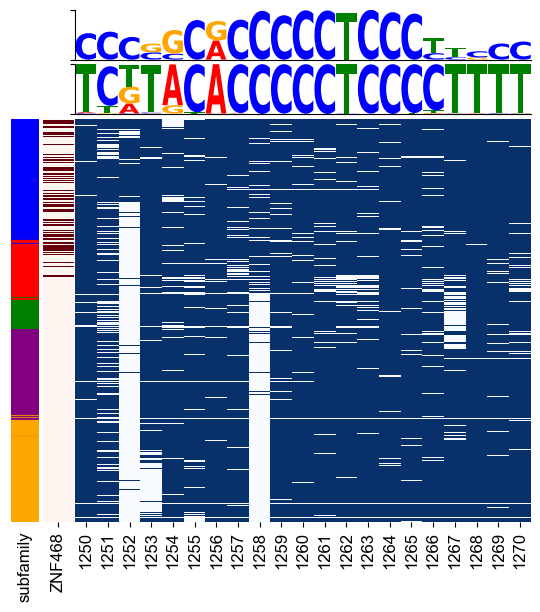

In [23]:
fig = plt.figure(figsize=[7, 7])
gs = GridSpec(20, 50)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

# subfamily
ax = plt.subplot(gs[5:, :3])
i = 3

data = Dfam_RM_gene.loc[list(Dfam_RM_gene.index)]

for k, name in enumerate(data['repeat name']):

    color = color_name_dict[name]
    y = len(data) - k
    ax.hlines(y, 0, 1, color=color)

ax.set_ylim(0, len(data))
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([0.5])
ax.set_xticklabels(['subfamily'], rotation=90)
ax.tick_params(left=False, right=False, bottom=False, top=False)
[ax.spines[loc].set_visible(False) for loc in ['top','right','left', 'bottom']]


# ZNF443の結合
ax = plt.subplot(gs[5:, i:i+3])
i += 3

data = Dfam_RM_KZFP[gene].loc[Dfam_RM_gene.index].to_frame()

sns.heatmap(data, cmap='Reds', cbar=False, ax=ax)
ax.set_xticklabels([gene], rotation=90)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.tick_params(left=False)

# match with consensus
ax = plt.subplot(gs[5:, i:i+len(sequence)*2])

data = heatmap
sns.heatmap(data, cmap='Blues', cbar=False, ax=ax)

ax.set_yticklabels('')
ax.set_ylabel('')
ax.tick_params(left=False)


# motif
ax = plt.subplot(gs[1:3, i:i+len(sequence)*2])

data = (motif/0.25).apply(np.log2)
data = pd.DataFrame(np.where(data>=0, data, 0), columns=['A', 'C', 'G', 'T'])
motif_color_dict = {'A': 'red', 'T': 'green', 'C': 'blue', 'G': 'orange'}

logomaker.Logo(data, 
               color_scheme=motif_color_dict, 
               ax=ax)

ax.tick_params(bottom=False)
ax.set_xticklabels([])
ax.set_yticklabels([''])
ax.set_ylim(0, 2)
[ax.spines[loc].set_visible(False) for loc in ['top','right']]


# consensus
ax = plt.subplot(gs[3:5, i:i+len(sequence)*2])

data = consensus_matrix_with_KZFP_not_deletion[['A', 'T', 'G', 'C']]
data.index = range(len(data))
motif_color_dict = {'A': 'red', 'T': 'green', 'C': 'blue', 'G': 'orange'}

logomaker.Logo(data, 
               color_scheme=motif_color_dict, 
               ax=ax)

ax.tick_params(bottom=False)
ax.set_xticklabels([])
ax.set_yticklabels([''])
ax.set_ylim(0, 1)
[ax.spines[loc].set_visible(False) for loc in ['top','right']]

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6E_ZNF468.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6E_ZNF468.pdf', bbox_inches='tight', transparent=True, dpi=300)

plt.show()

### ZNF433

In [24]:
gene = 'ZNF433'

In [25]:
# annotation
Dfam_RM_gene = Dfam_RM_fil

# MSA
MSA = MSA_df.loc[Dfam_RM_gene.index]

# KZFP
motif_start, motif_end = 305, 319
start, end = motif_start-50, motif_end+50
KZFP = KZFP_df_fil[(KZFP_df_fil['KZFP gene symbol']==gene) & (KZFP_df_fil['summit position in repeat alignment']>=start) & (KZFP_df_fil['summit position in repeat alignment']<=end) ]


In [26]:
# motif
motif_metadata = motif_metadata_df_nodup[motif_metadata_df_nodup['KZFP gene symbol']==gene]
motif = motif_matrix_df[(gene, 'GSE78099')][['A', 'C', 'G', 'T']]

if motif_metadata['motif strand'].values[0] == '-':

    motif = motif.sort_index(ascending=False)[['T', 'G', 'C', 'A']]

sequence = ''
for position in motif.index:

    v = motif.loc[position].sort_values(ascending=False)
    b = v.index[0]
    
    sequence += b

print(sequence)
sequence = list(sequence.lower())

CTGACGTCATCATTG


In [27]:
# consensus sequence derived by TE copies overlapping with KZFP peaks

MSA_KZFP = MSA[MSA.index.isin(KZFP['repeat name'])]
consensus_with_KZFP = ''
consensus_matrix_with_KZFP = list()

for position in MSA_KZFP.columns:

    count = MSA_KZFP[position].value_counts(normalize=True).rename(position)
    consensus_matrix_with_KZFP.append(count)

consensus_matrix_with_KZFP = pd.concat(consensus_matrix_with_KZFP, axis=1).T.fillna(0)
consensus_matrix_with_KZFP = consensus_matrix_with_KZFP[['a', 'g', 'c', 't', '-']]
consensus_matrix_with_KZFP.columns = ['A', 'G', 'C', 'T', '-']

# remove deletion
consensus_matrix_with_KZFP_not_deletion = consensus_matrix_with_KZFP[consensus_matrix_with_KZFP['-']<0.5]
consensus_matrix_with_KZFP_not_deletion = consensus_matrix_with_KZFP_not_deletion.loc[motif_start-1:motif_end-1]
not_deletion_index = consensus_matrix_with_KZFP_not_deletion.index

consensus_with_KZFP = ''
for position in consensus_matrix_with_KZFP_not_deletion.index:
    
    count = MSA_KZFP[position].value_counts(normalize=True)
    consensus_with_KZFP += count.index[0]


In [28]:
# heatmapについて
heatmap = MSA.T.loc[not_deletion_index].T

for col, base in zip(heatmap.columns, consensus_with_KZFP):
    
    heatmap[col] = heatmap[col]==base

MSA.T.loc[not_deletion_index].T

,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318
repeat name,,,,,,,,,,,,,,,
MER11A_chr6_dup35,g,a,c,c,a,c,t,-,-,-,-,-,-,a,t
MER11A_chr16_dup4,g,a,c,c,a,c,t,-,-,-,-,-,-,a,t
MER11A_chr12_dup18,g,a,c,c,-,c,t,g,t,g,a,t,a,a,t
MER11A_chr4_dup51,g,a,c,c,a,c,t,-,-,-,a,t,a,a,t
MER11A_chr2_dup29,g,a,c,c,a,c,t,a,t,g,a,t,a,t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MER11C_chr11_dup58,g,a,c,c,-,c,t,g,t,a,a,t,a,a,t
MER11C_chr11_dup2,g,a,-,c,-,c,t,g,t,a,a,t,a,a,t
MER11C_chr11_dup60,g,a,c,c,-,c,t,g,t,a,a,t,a,a,t


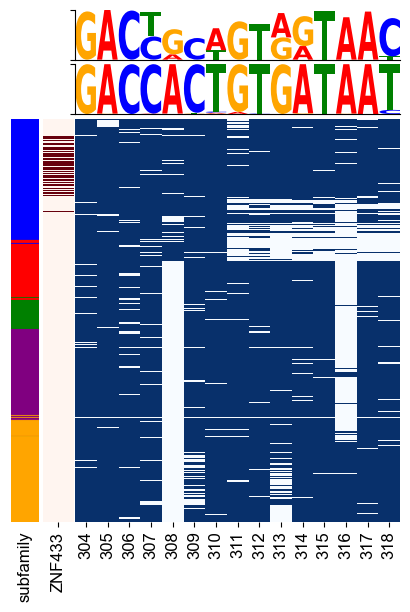

In [29]:
fig = plt.figure(figsize=[7, 7])
gs = GridSpec(20, 50)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

# subfamily
ax = plt.subplot(gs[5:, :3])
i = 3

data = Dfam_RM_gene

for k, name in enumerate(data['repeat name']):

    color = color_name_dict[name]
    y = len(data) - k
    ax.hlines(y, 0, 1, color=color)

ax.set_ylim(0, len(data))
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([0.5])
ax.set_xticklabels(['subfamily'], rotation=90)
ax.tick_params(left=False, right=False, bottom=False, top=False)
[ax.spines[loc].set_visible(False) for loc in ['top','right','left', 'bottom']]


# binding profile
ax = plt.subplot(gs[5:, i:i+3])
i += 3

data = Dfam_RM_KZFP[gene].loc[Dfam_RM_gene.index].to_frame()

sns.heatmap(data, cmap='Reds', cbar=False, ax=ax)
ax.set_xticklabels([gene], rotation=90)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.tick_params(left=False)

# match with consensus
ax = plt.subplot(gs[5:, i:i+len(sequence)*2])

data = heatmap
sns.heatmap(data, cmap='Blues', cbar=False, ax=ax)

ax.set_yticklabels('')
ax.set_ylabel('')
ax.tick_params(left=False)


# motif
ax = plt.subplot(gs[1:3, i:i+len(sequence)*2])

data = (motif/0.25).apply(np.log2)
data = pd.DataFrame(np.where(data>=0, data, 0), columns=['A', 'C', 'G', 'T'])
motif_color_dict = {'A': 'red', 'T': 'green', 'C': 'blue', 'G': 'orange'}

logomaker.Logo(data, 
               color_scheme=motif_color_dict, 
               ax=ax)

ax.tick_params(bottom=False)
ax.set_xticklabels([])
ax.set_yticklabels([''])
ax.set_ylim(0, 2)
[ax.spines[loc].set_visible(False) for loc in ['top','right']]


# consensus
ax = plt.subplot(gs[3:5, i:i+len(sequence)*2])

data = consensus_matrix_with_KZFP_not_deletion[['A', 'T', 'G', 'C']]
data.index = range(len(data))
motif_color_dict = {'A': 'red', 'T': 'green', 'C': 'blue', 'G': 'orange'}

logomaker.Logo(data, 
               color_scheme=motif_color_dict, 
               ax=ax)

ax.tick_params(bottom=False)
ax.set_xticklabels([])
ax.set_yticklabels([''])
ax.set_ylim(0, 1)
[ax.spines[loc].set_visible(False) for loc in ['top','right']]

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6E_ZNF433.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure6/Supplementary Figure6D_ZNF433.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()